# Neural Networks

 ### Training the network
Training the network is equivalent of determining the weights and biases in the network that minimizes the loss. It consists of two major parts, forward propagation and back propagation. In the forward propagation there are two operations that are taking place: summation and activation.

<img src="nn5.png" width="800" height="600">


### One neuron


<img src="nn3.png" width="400" height="300">


#### Summation
The idea is to multiply each input value with a weight, which constitues the linear part. 
$$z = \vec{\omega}^{^T} \cdot \vec{x} = \sum_{i=0}^{n} = \omega_{i}x_{i}$$

$$z= \omega_{0}x_0 + \omega_1 x_1 + \omega_2 x_2 +\omega_3 x_3$$
By setting $x_0 = 1 $ then $w_0$ takes the role of the bias in the neural network. The equation becomes:
$$z=  \omega_1 x_1 + \omega_2 x_2 +\omega_3 x_3 + b$$

#### Activation
The value of $z$ is passed to an activation function. 
$$a(z)$$
Some known activation functions:

In [14]:
import numpy as np

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# ReLU function
def relu(x):
    return np.maximum(0, x)

# Leaky ReLU function
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, x * alpha)

# Tanh function
def tanh(x):
    return np.tanh(x)

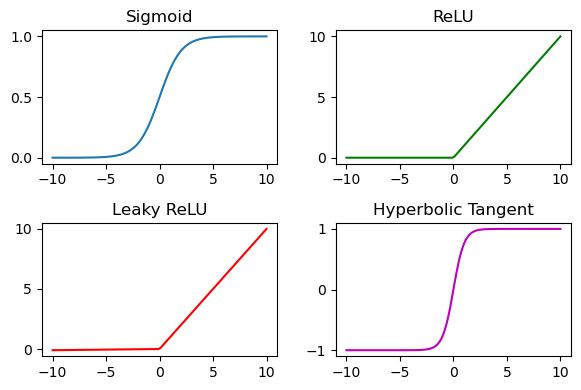

In [15]:
import matplotlib.pyplot as plt

x = np.linspace(-10,10,100)

plt.figure(figsize=(6, 4))  # Adjust the size as needed
y1 = sigmoid(x)
y2 = relu(x)
y3 = leaky_relu(x)
y4 = tanh(x)
# Plot 1
plt.subplot(2, 2, 1)  # (rows, columns, plot_number)
plt.plot(x, y1)
plt.title('Sigmoid')

# Plot 2
plt.subplot(2, 2, 2)  # Second plot in a 2x2 grid
plt.plot(x, y2, color = 'green')
plt.title('ReLU')

# Plot 3
plt.subplot(2, 2, 3)  # Third plot in a 2x2 grid
plt.plot(x, y3, color = 'red')
plt.title('Leaky ReLU')

# Plot 4
plt.subplot(2, 2, 4)  # Fourth plot in a 2x2 grid
plt.plot(x, y4, color = 'm')
plt.title('Hyperbolic Tangent')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()
zig = 1/(1 + np.exp(-x)) # Sigmoid function



### A simple example
Summation
$$ \vec{\omega}^T = \begin{bmatrix} -0.01 & 0.2 & 0.1 & 0.03 & -0.04 \end{bmatrix} \quad \text{and} \quad \vec{x} = \begin{bmatrix} 4583 \\ 1508.0 \\ 128.0 \\ 360.0 \\ 1.0 \end{bmatrix} $$
And for the bias, we can choose 0.01.

$$z = -0.01 \cdot 4583 + 0.02 \cdot 1508 + 0.1 \cdot 128 + 0.03 \cdot 360 - 0.04 \cdot 1 + 0.01$$

The value of $z$, which constitutes the linear part is passed to the activation function to produce one single number.
$$a(z) = \sigma (z) = \frac{1}{1+e^{-z}}$$

In [12]:
# Calculate the linear part
x = [4583, 1508, 128, 360, 1 ]
omega = [-0.01, 0.2, 0.1, 0.03, -0.4]

# Compute the scalar product of x and omega
z = sum([x_i * omega_i for x_i, omega_i in zip(x, omega)]) + 0
z

278.9700000000001

In [13]:
# Pass that value into the activation function
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

a = sigmoid(z)
a


1.0

### Forward Propagation
Let's take a look at more nodes

<img src="nn4.png" width="400" height="300">

In the first layer
$$z_{1}^{[1]} = \vec{\omega}^{[1]}_1 \cdot \vec{x}  + b_1^{[1]}$$ 
$$z_{2}^{[1]} = \vec{\omega}^{[1]}_2 \cdot \vec{x}  + b_2^{[2]}$$
$$z_{3}^{[1]} = \vec{\omega}^{[1]}_3 \cdot \vec{x}  + b_3^{[2]}$$
$$a_{1}^{[1]} = \sigma (z_{1}^{[1]})$$ 
$$a_{2}^{[1]} = \sigma (z_{2}^{[1]})$$ 
$$a_{3}^{[1]} = \sigma (z_{3}^{[1]})$$ 


Now let $$\vec{a}^{[1]} = \begin{bmatrix} a^{[1]}_1 \\ a^{[1]}_2 \\ a^{[1]}_3 \end{bmatrix}$$

In the seconda layer
$$z_{1}^{[2]} = \vec{\omega}^{[2]}_1 \cdot \vec{a}^{[1]}  + b_1^{[2]}$$ 
$$z_{2}^{[2]} = \vec{\omega}^{[2]}_2 \cdot \vec{a}^{[1]}  + b_2^{[2]}$$

$$a_{1}^{[2]} = \sigma (z_{1}^{[2]})$$ 
$$a_{2}^{[2]} = \sigma (z_{2}^{[2]})$$ 



In the third layer
$$z^{[3]} = \vec{\omega}^{[3]} \cdot \vec{a}^{[2]}  + b_1^{[3]}$$ 
$$\hat{y} = a^{[3]} = \sigma (z^{[3]})$$ 

#### Loss/cost function
$$\jmath = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]$$
$$J(y, \hat{y}) = -\left[ y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right]$$

### Gradient Descent
$$\Omega = \Omega - \eta \Delta_{\Omega} J(\Omega) $$

### Backpropagation
$$\frac{\partial J}{\partial \omega^{[3]}} = \frac{\partial J}{\partial a^{[3]}} \cdot \frac{\partial a^{[3]}}{\partial z^{[3]}} \cdot \frac{\partial z^{[3]}}{\partial \omega^{[3]}}$$

$$\frac{\partial J}{\partial \omega^{[2]}} = \frac{\partial J}{\partial z^{[3]}} \cdot \frac{\partial z^{[3]}}{\partial a^{[2]}} \cdot \frac{\partial a^{[2]}}{\partial z^{[2]}} \cdot \frac{\partial z^{[2]}}{\partial \omega^{[2]}}$$

$$\frac{\partial J}{\partial \omega^{[1]}} = \frac{\partial J}{\partial z^{[2]}} \cdot \frac{\partial z^{[2]}}{\partial a^{[1]}} \cdot \frac{\partial a^{[1]}}{\partial z^{[1]}} \cdot \frac{\partial z^{[1]}}{\partial \omega^{[1]}}$$